In [1]:
import numpy as np
import pandas as pd
import  scipy.stats                     as  stats
import  statsmodels.stats.proportion    as  smp
import matplotlib.pyplot     as     plt
import seaborn as sns
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

In [6]:
#11.10 example of page410
caller=np.array([[81,65],[48,111]])
chisq_val,p_val,dof,exp_frequ=stats.chi2_contingency(caller)
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chisq_val, p_val,dof))

Chi-square statistic 18.92395 P value 0.000014 Degrees of freedom 1


In [7]:
#5 summary
from numpy import percentile
from numpy.random import rand
# generate data sample
data = rand(1000)
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.001
Q1: 0.239
Median: 0.486
Q3: 0.736
Max: 0.999


In [10]:
chi=pd.read_csv('chisqua.csv')
chi.head()

,Observed Frequencies,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Hotel,NaN,NaN,NaN
1,Choose Again?,Golden Palm,Palm Royale,Palm Princess,Total
2,Yes,128,199,186,513
3,No,88,33,66,187
4,Total,216,232,252,700


In [11]:
chi.dropna(how='all')

,Observed Frequencies,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Hotel,NaN,NaN,NaN
1,Choose Again?,Golden Palm,Palm Royale,Palm Princess,Total
2,Yes,128,199,186,513
3,No,88,33,66,187
4,Total,216,232,252,700


In [27]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [30]:
data=pd.read_csv('ForeignMarket2.csv')
data.head()
data.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6'],inplace=True)

In [31]:
coe=data.values
coe

array([['Cambodia', 'East Asia & Pacific', '795', '930'],
       ['China', 'East Asia & Pacific', '620', '615'],
       ['Hong Kong SAR, China', 'East Asia & Pacific', '590', '565'],
       ['Indonesia', 'East Asia & Pacific', '615', '660'],
       ['Malaysia', 'East Asia & Pacific', '450', '485'],
       ['Philippines', 'East Asia & Pacific', '585', '660'],
       ['Singapore', 'East Asia & Pacific', '460', '440'],
       ['Taiwan, China', 'East Asia & Pacific', '655', '720'],
       ['Thailand', 'East Asia & Pacific', '595', '760'],
       ['Vietnam', 'East Asia & Pacific', '610', '600'],
       ['Belarus', 'Eastern Europe & Central Asia', '1,510', '2,315'],
       ['Bulgaria', 'Eastern Europe & Central Asia', '1,375', '1,365'],
       ['Cyprus', 'Eastern Europe & Central Asia', '865', '1010'],
       ['Lithuania', 'Eastern Europe & Central Asia', '750', '800'],
       ['Macedonia, FYR', 'Eastern Europe & Central Asia', '1,376',
        '1,380'],
       ['Montenegro', 'Eastern Europe

In [39]:
final=pd.DataFrame(coe)
final=final.rename(columns={0:'country',1:'region',2:'export',3:'import'})
final.head()

,country,region,export,import
0,Cambodia,East Asia & Pacific,795,930
1,China,East Asia & Pacific,620,615
2,"Hong Kong SAR, China",East Asia & Pacific,590,565
3,Indonesia,East Asia & Pacific,615,660
4,Malaysia,East Asia & Pacific,450,485


In [45]:
a=np.array(final['region'])
b=np.array(final['export'])
c=np.array(final['import'])

In [57]:
life_type_df = pd.DataFrame()

df1            = pd.DataFrame({'shift': 'r', 'Life_hours':a})
df2            = pd.DataFrame({'shift': 'e', 'Life_hours':b})
df3            = pd.DataFrame({'shift': 'i', 'Life_hours':c})

life_type_df = life_type_df.append(df1) 
life_type_df = life_type_df.append(df2) 
life_type_df = life_type_df.append(df3) 
life_type_df

,shift,Life_hours
0,r,East Asia & Pacific
1,r,East Asia & Pacific
2,r,East Asia & Pacific
3,r,East Asia & Pacific
4,r,East Asia & Pacific
5,r,East Asia & Pacific
6,r,East Asia & Pacific
7,r,East Asia & Pacific
8,r,East Asia & Pacific
9,r,East Asia & Pacific


In [56]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Life_hours ~ shift', data = life_type_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

ValueError: shapes (120,76) and (120,76) not aligned: 76 (dim 1) != 120 (dim 0)

In [59]:
df=pd.read_csv('Golfball.csv')
df.head()


,Design1,Design2,Design3,Design4
0,206.32,217.08,226.77,230.55
1,207.94,221.43,224.79,227.95
2,206.19,218.04,229.75,231.84
3,204.45,224.13,228.51,224.87
4,209.65,211.82,221.44,229.49


In [61]:
md1=np.array(df['Design1'])
md2=np.array(df['Design2'])
md3=np.array(df['Design3'])
md4=np.array(df['Design4'])

In [62]:
mean_pressure_df = pd.DataFrame()

df1            = pd.DataFrame({'design': '1', 'Mean_Pressure':md1})
df2            = pd.DataFrame({'design': '2', 'Mean_Pressure':md2})
df3            = pd.DataFrame({'design': '3', 'Mean_Pressure':md3})
df4            = pd.DataFrame({'design': '4', 'Mean_Pressure':md4})

mean_pressure_df = mean_pressure_df.append(df1) 
mean_pressure_df = mean_pressure_df.append(df2) 
mean_pressure_df = mean_pressure_df.append(df3) 
mean_pressure_df = mean_pressure_df.append(df4) 

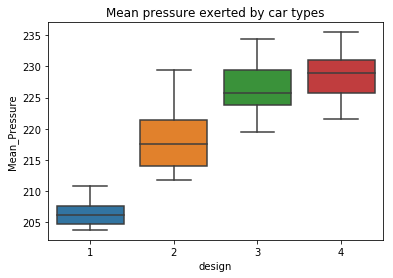

In [63]:
sns.boxplot(x = "design", y = "Mean_Pressure", data = mean_pressure_df)
plt.title('Mean pressure exerted by car types')
plt.show()

In [64]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Mean_Pressure ~ design', data = mean_pressure_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

             sum_sq    df          F        PR(>F)
design    2990.9898   3.0  53.029822  2.731991e-13
Residual   676.8244  36.0        NaN           NaN


In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(mean_pressure_df['Mean_Pressure'], mean_pressure_df['design']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2     11.902   6.6795 17.1245  True 
  1      3     19.974  14.7515 25.1965  True 
  1      4     22.008  16.7855 27.2305  True 
  2      3     8.072    2.8495 13.2945  True 
  2      4     10.106   4.8835 15.3285  True 
  3      4     2.034   -3.1885  7.2565 False 
---------------------------------------------
